# Singular Value Decompositions
[The Github](https://github.com/dynamicslab/databook_python/blob/master/)
## Overview
The `numpy` library provides the `numpy.linalg.svd` function for computing the SVD. We pass a matrix $\mathbf{X}$ as the first argument, and then we can pass various options. For example, the `full_matrices` option which determines whether to use the economy SVD or full SVD. The following example illustrates this.

In [8]:
import numpy as np
from IPython.display import display, Math, Latex

# displays a matrix using LaTeX
def bmatrix(a):
    
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

X = np.array([[1,2],[2,1]])
display(Math(f"X = {bmatrix(X)}"))
 
        
# Full Matrices
U, S, Vt = np.linalg.svd(X, full_matrices=True)
        
display(Math(f"U = {bmatrix(U)}"))
display(Math(f"\\Sigma = {bmatrix(S)}"))
display(Math(f"V^T = {bmatrix(Vt)}"))
        
        
# economy SVD
Uh, Sh, Vht = np.linalg.svd(X, full_matrices=False)
        
display(Math("\\hat{U} = " + f"{bmatrix(Uh)}"))
display(Math("\\hat{\\Sigma} = " + f"{bmatrix(Sh)}"))
display(Math("\\hat{V}^T = " + f"{bmatrix(Vht)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can use the `imread` function from the `matplotlib.image` library to convert an image into a data matrix. We can then use `imshow` from the `matplotlib.pyplot` library to display the image. 

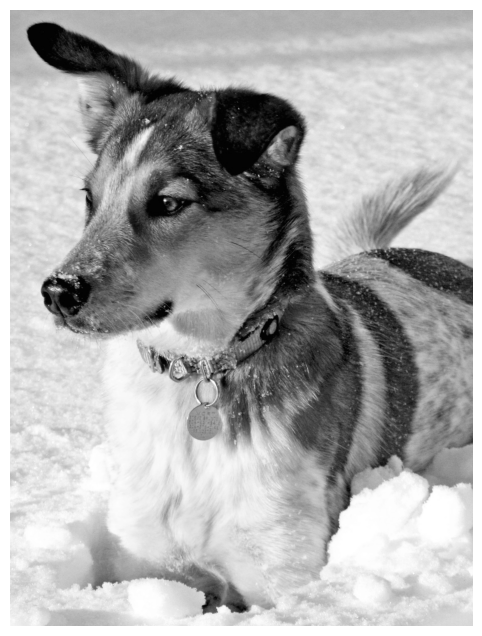

In [9]:
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt

A = imread(os.path.join('..','Project','dog.jpg'))
X = np.mean(A, -1); # converts the image to grayscale
img = plt.imshow(X)
img.set_cmap('gray') # changes the intensity map to display as gray
plt.axis('off')
plt.show()

We can perform the SVD on this unsuspecting dog to compare the image quality before and after.

SVD completed in 10.495768785476685 seconds.


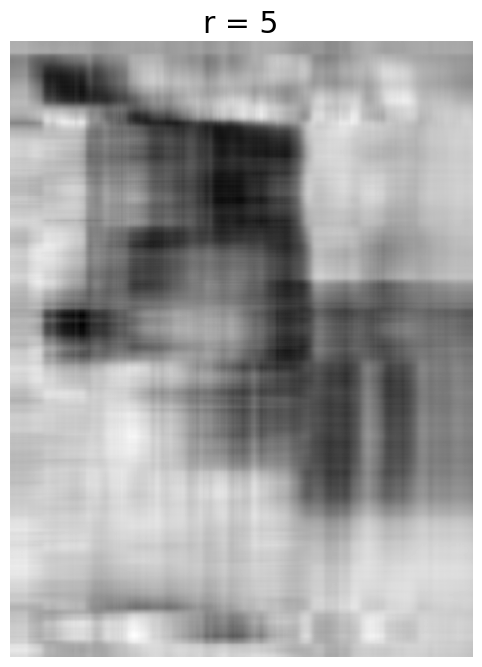

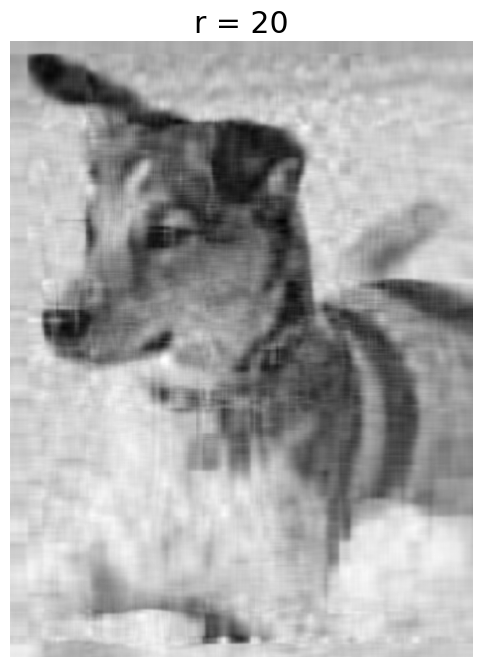

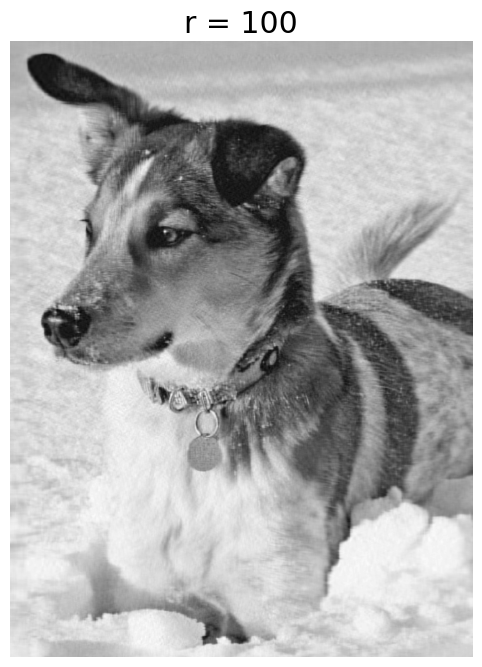

In [10]:
import time

start = time.time()

U, S, Vt = np.linalg.svd(X,full_matrices=True)

end = time.time()
print(f"SVD completed in {end - start} seconds.")

S = np.diag(S)

for r in (5,20,100):
    Xapx = U[:,:r] @ S[0:r,:r] @ Vt[:r,:]
    img = plt.imshow(Xapx)
    plt.axis('off')
    img.set_cmap('gray')
    plt.title(f"r = {r}")
    plt.show()

Notice that at $r=100$, the loss in quality is fairly negligable.

heres some code from the github

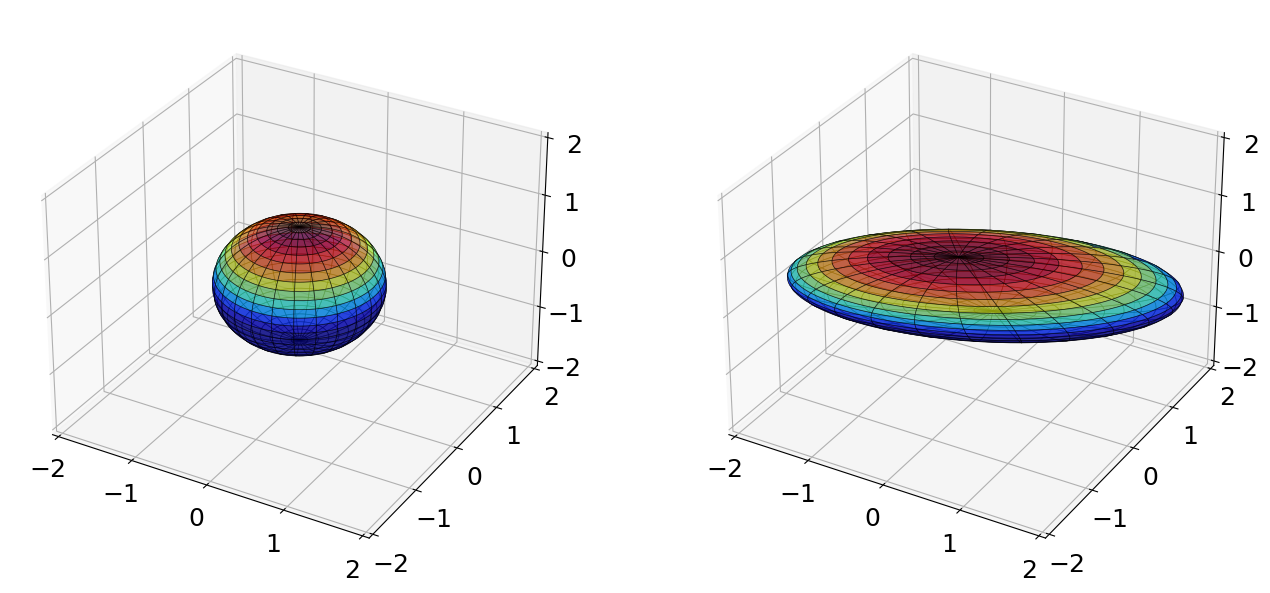

In [11]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

This representation is supposed to give the following intuition:

The way a matrix $\mathbf{X}$ acts on a space $\mathbb{R}^n$ can be determined by how $\mathbf{X}$ maps a sphere into an elipsoid. In this case, $\mathbf{X}$ acts equivalently to three rotations and a stretching operation. Since rotation matrices do not commute in 3D, which this example is in (note the homomorphism $\operatorname{SO}(3)\rightarrow\mathbb{H}$), we apply them in the specific order $\mathbf{X}=\mathbf{R}_z\mathbf{R}_y\mathbf{R}_x\boldsymbol{\Lambda}$ for $\boldsymbol{\Lambda}$ some diagonal matrix that stretches coordinates. We then have
$$\mathbf{U}=\mathbf{R}_z\mathbf{R}_y\mathbf{R}_x,\qquad\boldsymbol{\Sigma}=\boldsymbol{\Lambda},\qquad\mathbf{V}=\mathbf{I}_3.$$

The SVD is invariant under unitary maps. This is trivial to prove. Let $\mathbf{X}=\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^*$, and recall $\mathbf{V}^*$ is the conjugate transpose (in physics $\mathbf{V}^\dagger$), and $\operatorname{U}(n)=\left\{\mathbf{A}\in\mathbb{C}^{n\times n}\mid\mathbf{A}^{-1}=\mathbf{A}^*\right\}$.

Consider the left unitary transformation $\mathbf{Y}=\mathbf{CX}$ for $\mathbf{C}\in\operatorname{U}(n)$. We have
$$\mathbf{Y}^*\mathbf{Y}=\mathbf{X}^*\mathbf{C}^*\mathbf{C}\mathbf{X}=\mathbf{X}^*\mathbf{X}.$$
Therefore, $\mathbf{Y}$ has the same eigendecomposition used to construct $\mathbf{V}$ and $\boldsymbol{\Sigma}$. Let $\mathbf{Y}=\mathbf{U}_\mathbf{Y}\boldsymbol{\Sigma}\mathbf{V}^*$, since we know the latter two are the same. It follows that
$$\mathbf{U}_\mathbf{Y}=\mathbf{Y}\mathbf{V}\boldsymbol{\Sigma}^{-1}=\mathbf{CXV}\boldsymbol{\Sigma}^{-1}=\mathbf{CU}_\mathbf{X}\boldsymbol{\Sigma}\mathbf{V}^*\mathbf{V}\boldsymbol{\Sigma}^{-1}=\mathbf{CU}_\mathbf{X}.$$
Therefore, $\mathbf{U}_\mathbf{Y}=\mathbf{CU}_\mathbf{X}$, and
$$\mathbf{Y}=\mathbf{CU}_\mathbf{X}\boldsymbol{\Sigma}\mathbf{V}^*$$
is an SVD of $\mathbf{Y}$. The logic for showing this is true of right transformations $\mathbf{X}\mapsto\mathbf{XC}^*$ is the same.

It can be difficult to construct $\mathbf{XX}^*$ or $\mathbf{X}^*\mathbf{X}$ if the matrix is extremely large, but often constructing one is much easier than the other. For example, with a tall and skinny matrix, $\mathbf{XX}^*$ is extremely large, so instead we compute $\mathbf{X}^*\mathbf{X}$, and obtain $\mathbf{V}$ and $\boldsymbol{\Sigma}$ via the eigenvector problem
$$\mathbf{X}^*\mathbf{XV}=\mathbf{V}\boldsymbol{\hat{\Sigma}}^2.$$
If there are singular values in $\boldsymbol{\hat{\Sigma}}$ equal to $0$, define $\boldsymbol{\tilde{\Sigma}}$ as the matrix keeping only the singular values within our desired rank $r$, and $\mathbf{\tilde{V}}$ as the matrix formed by corresponding singular vectors. We can then approximate
$$\mathbf{\tilde{U}}=\mathbf{X\tilde{V}}\boldsymbol{\tilde{\Sigma}}^{-1}.$$

We know many physical systems can be represented as $\mathbf{Ax}=\mathbf{b}$, with an unknown vector $\mathbf{x}$. However, in general, $\mathbf{A}$ is not singular, and precisely identifying the behavior of the solution can be difficult. Consider some $\mathbf{A}\in\mathbb{C}^{n\times m}$. For $n\ll m$ (short fat matrix), there likely exist infinite solutions. Similarly, for $m\ll n$, there likely exists no solution. In fact, since the matrix cannot have $n$ linearly independent columns, there exist vectors $\mathbf{b}$ for which no solution exists. Whether a solution exists is determined by the spaces $\mathbf{A}$ determines.
- $\operatorname{col}(\mathbf{A})$ is the same as $\operatorname{col}\left(\mathbf{\tilde{U}}\right)$.
- $\ker\left(\mathbf{A}^*\right)$ is orthogonal to $\operatorname{col}(\mathbf{A})$.
- $\operatorname{row}(\mathbf{A})=\operatorname{col}\left(\mathbf{\tilde{V}}\right)$.
- $\ker(\mathbf{A})$ is orthogonal to $\operatorname{row}(\mathbf{A})$.
Recall that for $\mathbf{b}\notin\operatorname{col}(\mathbf{A})$, the system is inconsistent, and for $\mathbf{b}\in\operatorname{col}(\mathbf{A})$ and $\dim(\ker\mathbf{A})\neq0$, there are infinitely many solutions. I have no idea what the following means, but apparently it's true:
- $\operatorname{col}(\mathbf{A})\oplus\ker(\mathbf{A}^*)=\mathbb{R}^n$,
- $\operatorname{col}(\mathbf{A}^*)\oplus\ker(\mathbf{A})=\mathbb{R}^n$.

In the overdetermined case where no solutions exist, we often want to find the $\mathbf{x}$ closest to the solution by computing $\mathbf{\tilde{x}}$ such that the least-squares error $\left\|\mathbf{Ax}-\mathbf{b}\right\|^2$ is minimized. Similarly, in the underdetermined case where infinite solutions exist, we want to find $\mathbf{\tilde{x}}$ such that $\|\mathbf{x}\|$ is minimized, the *minimum-norm* solution.

If we use the truncated SVD $\mathbf{A}=\mathbf{\tilde{U}}\boldsymbol{\tilde{\Sigma}}\mathbf{\tilde{V}}^*$, we can define the **Moore-Penrose Psuedo Inverse**:
$$\mathbf{A}^\dagger:=\mathbf{\tilde{V}\tilde{\Sigma}}^{-1}\mathbf{\tilde{U}}^*.$$
**NOTE**: The dagger does NOT denote the conjugate transpose, that's denoted by $A^*$ in math. Instead, the dagger denotes the pseudo-inverse. Why can't notations be more standardized across diciplines kasdj

From this, we have
$$\mathbf{A}^\dagger\mathbf{A}=\mathbf{\tilde{V}\tilde{V}}^*.$$
Note that this does not equal $\mathbf{I}$ unless our truncated SVD captures all singular values. Otherwise, this approximates the identity. Additionally, $\mathbf{\tilde{U}\tilde{U}}^*\neq\mathbf{I}$ in general, even though these hold for the full SVD.

With this information, we can solve the equation $\mathbf{Ax}=\mathbf{b}$ as:
$$\mathbf{A}^\dagger\mathbf{A}\mathbf{\tilde{x}}=\mathbf{A}^\dagger\mathbf{b}\implies\mathbf{\tilde{x}}=\mathbf{\tilde{V}\tilde{\Sigma}}^{-1}\mathbf{\tilde{U}}^*\mathbf{b}.$$
Plugging into the original equation, we see
$$\mathbf{A\tilde{x}}=\mathbf{\tilde{U}\tilde{\Sigma}\tilde{V}}^*\mathbf{\tilde{V}\tilde{\Sigma}}^{-1}\mathbf{\tilde{U}}^*\mathbf{b}=\mathbf{U}\mathbf{U}^*\mathbf{b}.$$
It's important to note that $\mathbf{\tilde{V}}^*\mathbf{\tilde{V}}=\mathbf{I}$, even though the reverse is not true. The same holds for $\mathbf{\tilde{U}}$. The book just stops here but im assuming this is satisfies the properties we were searching for, due to how the error in the SVD propigates. I'll look into it further later.

Also computation time we're looking at O(n2) and O(n) vs O(n3) which is good

+The condition number $\kappa$, defined as
$$\kappa(\mathbf{A}):=\frac{\sigma_\text{max}(\mathbf{A})}{\sigma_\text{min}(\mathbf{A})}$$
for a given matrix $\mathbf{A}$, measures the matrix' sensitivity to error under various matrix approximations. To illustrate, suppose we want to compute $\mathbf{Ax}=\mathbf{b}$ for some vector $\mathbf{x}$, but we do not have a precise definition of $\mathbf{x}$, and instead there exists some known error bound $\boldsymbol{\epsilon}_\mathbf{x}$. We then have
$$\mathbf{A}\left(\mathbf{x}+\boldsymbol{\epsilon}_\mathbf{x}\right)=\mathbf{A}\mathbf{x}+\mathbf{A}\boldsymbol{\epsilon}_\mathbf{x}=\mathbf{b}+\mathbf{A}\boldsymbol{\epsilon}_\mathbf{x}.$$
Define $\boldsymbol{\epsilon}_\mathbf{b}:=\mathbf{A}\boldsymbol{\epsilon}_\mathbf{x}$. We then write
$$\mathbf{A}\left(\mathbf{x}+\boldsymbol{\epsilon}_\mathbf{x}\right)=\mathbf{b}+\boldsymbol{\epsilon}_\mathbf{b}.$$
Recall that singular vectors/values and eigenvectors/values are analogous, so we can describe a singular vector $\mathbf{u}$ as corresponding to a given singular value. By what we already know about the SVD, we can suppose a worse case scenario for the approximation. Define $\boldsymbol{\epsilon}_\mathbf{x}$ to be the singular vector corresponding to $\sigma_\text{max}$, meaning our error term will have the maximum possible effect. Similarly, define $\mathbf{x}$ to be the singular vector corresponding to $\sigma_\text{min}$, meaning it will have the least possible effect, so most of our output comes from the error term. It follows that
$$\mathbf{A}\left(\mathbf{x}+\boldsymbol{\epsilon}_\mathbf{x}\right)=\sigma_\text{max}\boldsymbol{\epsilon}_\mathbf{x}+\sigma_\text{min}\mathbf{x}.$$
Notice that
\begin{align*}
\sigma_\text{min}\mathbf{x}&=\mathbf{b}\\
\sigma_\text{max}\boldsymbol{\epsilon}_\mathbf{x}&=\boldsymbol{\epsilon}_\mathbf{b}
\end{align*}

Notice that the **signal to noise ratio** is related to the *input* signal to noise ratio by a factor of $\kappa^{-1}$:
$$\frac{\|\mathbf{b}\|}{\left\|\boldsymbol{\epsilon}_\mathbf{b}\right\|}=\frac{\left\|\sigma_\text{min}\mathbf{x}\right\|}{\left\|\sigma_\text{max}\boldsymbol{\epsilon}_\mathbf{x}\right\|}=\frac{\sigma_\text{min}}{\sigma_\text{max}}\frac{\left\|\mathbf{x}\right\|}{\left\|\boldsymbol{\epsilon}_\mathbf{x}\right\|}.$$
Thus,
$$\frac{\sigma_\text{max}}{\sigma_\text{min}}\frac{\|\mathbf{b}\|}{\left\|\boldsymbol{\epsilon}_\mathbf{b}\right\|}=\kappa \frac{\|\mathbf{b}\|}{\left\|\boldsymbol{\epsilon}_\mathbf{b}\right\|}=\frac{\left\|\mathbf{x}\right\|}{\left\|\boldsymbol{\epsilon}_\mathbf{x}\right\|}.$$

Thus, the condition number $\kappa(\mathbf{A})$ gives us a way of describing the amount of noise that can be induced in matrix operations by some error in measurements.

Similarly, if $\mathbf{b}$ is not precisely specified, then the worst case scenario is when $\mathbf{b}$ corresponds to $\sigma_\text{max}$, since it may not be precisely defined, and when $\mathbf{\epsilon}_\mathbf{b}$ corresponds to $\sigma_\text{min}$, since it in a sense normalizes the data within an error bound. We then approximate
$$\mathbf{x}+\boldsymbol{\epsilon}_\mathbf{x}\approx\mathbf{A}^\dagger\left(\mathbf{b}+\boldsymbol{\epsilon}_\mathbf{b}\right)=\frac{1}{\sigma_\text{max}}\mathbf{b}+\frac{1}{\sigma_\text{min}}\boldsymbol{\epsilon}_\mathbf{b}.$$
The signal to noise of the approximated value of $\mathbf{x}$ has again been reduced by $\kappa(\mathbf{A})$.

It's natural to think we can make our approximations by truncating the SVD more aggressively, but since we must also remove singular vectors, this decreases $\operatorname{col}(\mathbf{U})$, and thus has a negative tradeoff as well.

With all of this knowledge, we can apply the SVD to one-dimensional linear regresion. If we have a series of points $(x,y)$ which we suppose are related via a homogeneous linear equation, we can give
$$m\mathbf{x}=\mathbf{y},$$
for $\mathbf{x}$ our $x$ values, $\mathbf{y}$ our $y$ values, and $m$ some slope that we wish to solve for. We give
$$\mathbf{\tilde{U}\tilde{\Sigma}\tilde{V}}^*m=\mathbf{y},$$
and take the pseudo left inverse:
$$m=\mathbf{\tilde{V}\tilde{\Sigma}}^{-1}\mathbf{\tilde{U}}^*.$$
Since this is a column vector, $\mathbf{\tilde{\Sigma}}=\|\mathbf{x}\|$, $\mathbf{V}^*=1$, and $\mathbf{U}=\frac{1}{\|\mathbf{x}\|}\mathbf{x}$. Thus,
$$m=\frac{\mathbf{x}^*\mathbf{b}}{\|\mathbf{x}\|^2}.$$

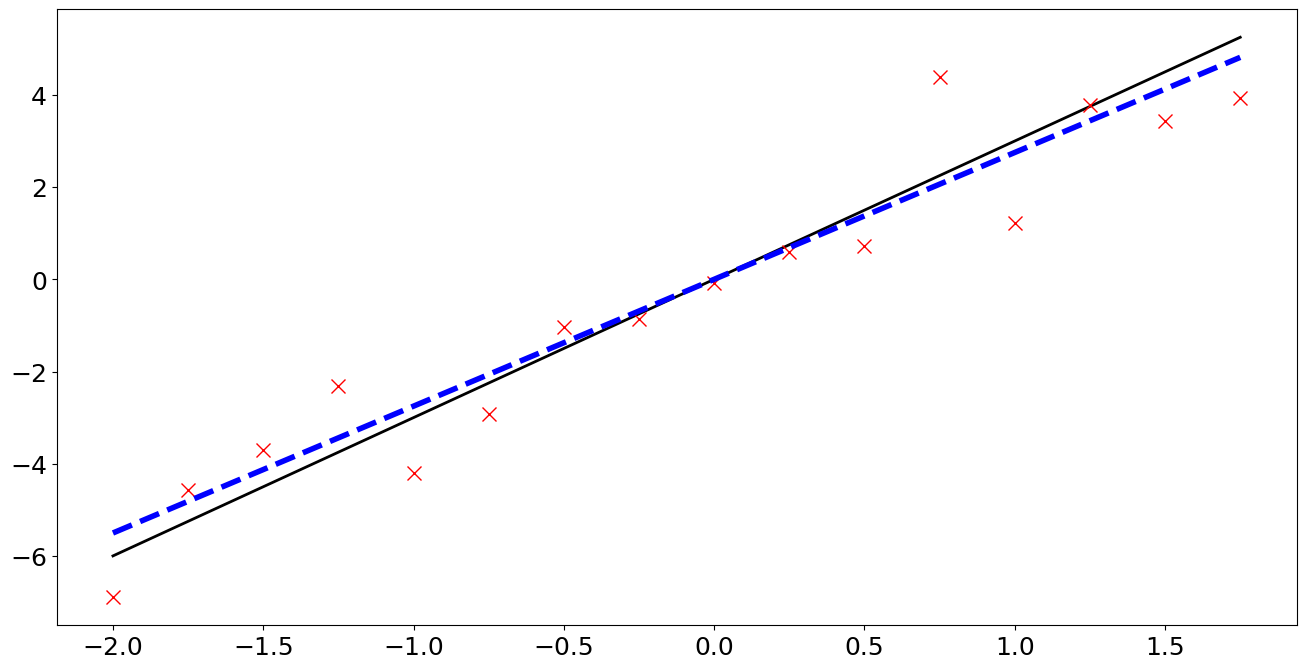

In [5]:
m = 3 # slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1,1)
b = m*a + np.random.randn(*a.shape) # adds noise but wtf is *a.shape?

# compute least-squares approximation via SVD
U, S, VT = np.linalg.svd(a,full_matrices=False)
mtd = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # least square fit but wtf is actually happening

# plotting
plt.plot(a, m*a, color='k', linewidth=2, label='True Line')
plt.plot(a,b,color='r', marker='x', linestyle='None', markersize=10, label='Noise')
plt.plot(a,mtd * a,'--',color='b',linewidth=4,label='Regression Line')

We have a data set of heat measurements for 4 materials in 13 distinct mixtures, and we wish to find some relation. Thus, we are solving $\mathbf{Ax}=\mathbf{b}$ for $\mathbf{A}\in\mathbb{R}^{13\times4}$, where $\mathbf{x}$ is some weighting that relates the 4 materials.

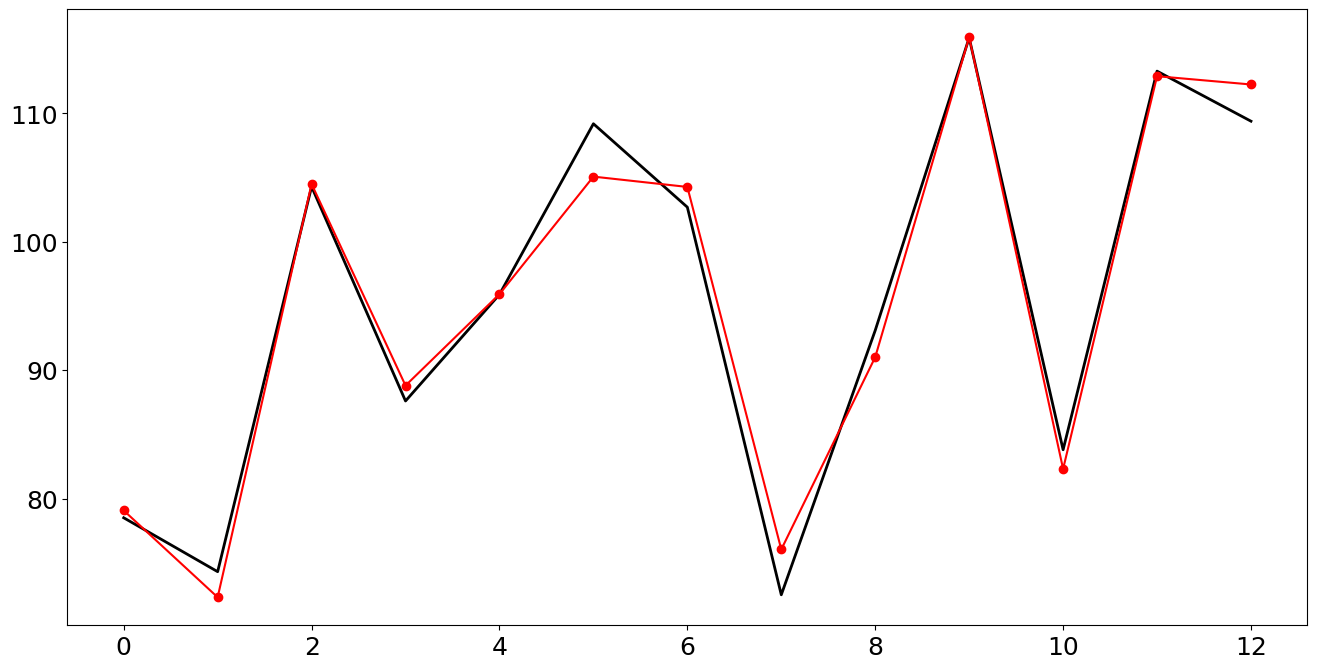

In [15]:
A = np.loadtxt(os.path.join('..','Project','hald_ingredients.csv'), delimiter=',')
b = np.loadtxt(os.path.join('..','Project','hald_heat.csv'), delimiter=',')

# Solve Ax=b
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
# ok i figured out whats going on here:
# A.T is A transpose for A a matrix, and the @ denotes matrix multiplication

plt.plot(b, color='k', linewidth=2, label='Heat Data')
plt.plot(A@x, '-o', color='r', label='regression')

# ALTERNATIVE: x = np.linalg.pinv(A)*b

We can see that our SVD, the red lines, matches fairly well with the actual data. I don't really know what the data means but thats okay.

We will now explore a larger data set to analyze the Boston housing market which is SO HORRIBLE omg

We claim there are 13 attributes that impact housing prices, and we have 506 samples of housing prices, along with quantitative measures for each 13 attributes per home. Thus, we have our data matrix $\mathbf{A}\in\mathbb{R}^{506\times13}$, which is the 13 attributes for each home, and our column vector $\mathbf{b}$, which is the housing prices. We want to find $\mathbf{x}$ such that $\mathbf{Ax}=\mathbf{b}$, and thus we can weight the importance of each of the 13 attibutes by the magnitude of its corresponding entry in our vector $\mathbf{x}$. I'm going to assume the 14th column of the given dataset is going to be our vector.

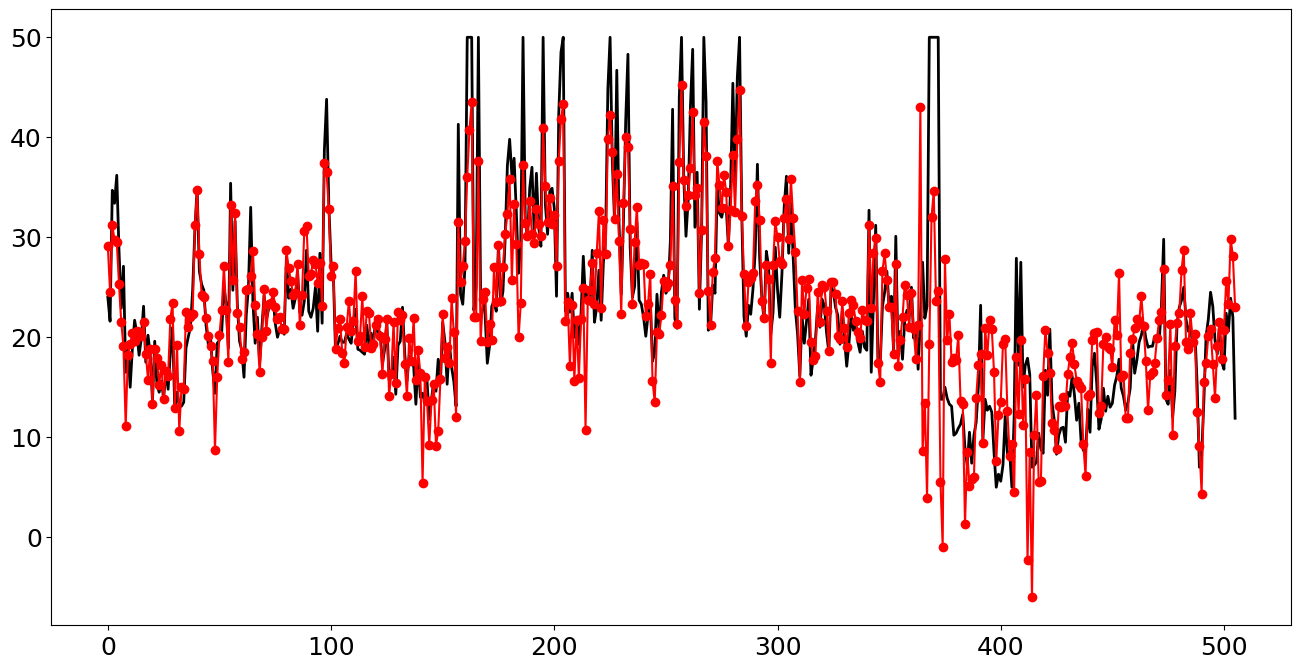

In [21]:
A = np.loadtxt(os.path.join('..','Project','housing.data'),usecols=range(13))
b = np.loadtxt(os.path.join('..','Project','housing.data'),usecols=range(13,14))

# Solve Ax=b
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Housing Data')
plt.plot(A@x, '-o', color='r', label='Regression')

It's not perfect, but it's better at predicting the housing market than I am.